In [1]:
from utils import set_working_directory_up_two_levels
set_working_directory_up_two_levels()

In [2]:
import matplotlib.pyplot as plt
import polars as pl
import numpy as np
import pandas as pd
import os
import pickle
import random
import seaborn as sns

from tqdm import tqdm
from src.data.loaders import get_loader
from joblib import Parallel, delayed
from functools import partial

import glob 
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"


%load_ext autoreload
%autoreload 2

2024-09-06 12:37:02.565626: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-06 12:37:02.565671: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-06 12:37:02.565696: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-06 12:37:02.574013: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [11]:
%%time
path = './data/shared/records/bigmacho/'
folders = os.listdir(path)
total = 0
magnitudes_list = []
for f in folders:
    try:
        records = glob.glob(os.path.join(path, f, 'fold_0', 'train', '*'))
        records = [x for x in records if x.endswith('.record')]
        dataset = get_loader(records, batch_size=5000, window_size=200, probed_frac=1., random_frac=0., normalize=None)
        n_samples = 0.
        for x, y in dataset:
            n_samples+=x['input'].shape[0]
            magnitudes = x['times'].numpy()
            deltat = magnitudes[:, 1:] - magnitudes[:, :-1]        
            magnitudes_list+=list(magnitudes)
            break
        total+=n_samples
    except:
        print('Problem with ', f)
    

[INFO] Probed: 1.00 Random: 0.00 Same: 0.00
[INFO] Normalization:  None
[INFO] Sampling random windows
[INFO] Probed: 1.00 Random: 0.00 Same: 0.00
[INFO] Normalization:  None
[INFO] Sampling random windows
[INFO] Probed: 1.00 Random: 0.00 Same: 0.00
[INFO] Normalization:  None
[INFO] Sampling random windows
[INFO] Probed: 1.00 Random: 0.00 Same: 0.00
[INFO] Normalization:  None
[INFO] Sampling random windows
[INFO] Probed: 1.00 Random: 0.00 Same: 0.00
[INFO] Normalization:  None
[INFO] Sampling random windows
[INFO] Probed: 1.00 Random: 0.00 Same: 0.00
[INFO] Normalization:  None
[INFO] Sampling random windows
[INFO] Probed: 1.00 Random: 0.00 Same: 0.00
[INFO] Normalization:  None
[INFO] Sampling random windows
[INFO] Probed: 1.00 Random: 0.00 Same: 0.00
[INFO] Normalization:  None
[INFO] Sampling random windows
[INFO] Probed: 1.00 Random: 0.00 Same: 0.00
[INFO] Normalization:  None
[INFO] Sampling random windows
[INFO] Probed: 1.00 Random: 0.00 Same: 0.00
[INFO] Normalization:  None
[

In [12]:
total = 64673856.0

In [13]:
with open('./data/shared/records/bigmacho/bigmacho_mjd.pickle', 'wb') as handle:
    pickle.dump(magnitudes_list, handle)

In [9]:
len(magnitudes_list)

154176493

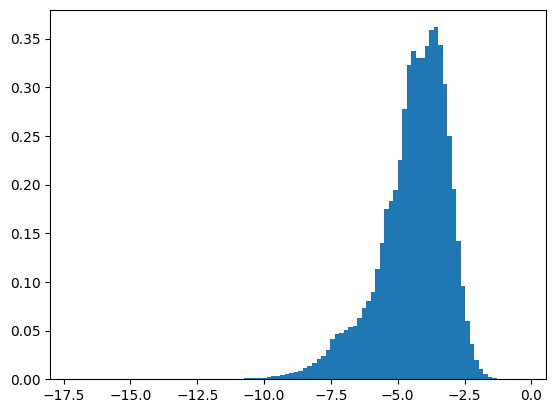

In [11]:
plt.hist(magnitudes_list, density=True, bins=100)
plt.show()